# purpose of the project
In this project we are going to analyse the users usage criteria for calls, messages and internet used. We will be able to find insights which will be useful for the telecom company to manage their future policies especially regarding thier vailable user plans.

Our methodology for this project is based on **following objectives**:
- Preprocessing of data including fixes the observed issues in the data like data types and missing values
- Perform analysis on the individual dataframes to create our own analytical dataframes and then used them to findout hidden insights in the data
- In the nd we will perform hypothesis testing to answere the question based on user plan avilable for this company.



---



#Initialization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing all the required libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



---



#Load data

In [ ]:
# LOading the data into pandas dataframe
calls=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Magaline analysis project/megaline_calls.csv')
internet=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Magaline analysis project/megaline_internet.csv')
messages=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Magaline analysis project/megaline_messages.csv')
plans=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Magaline analysis project/megaline_plans.csv')
users=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CLIENTS/6. topesanni/Data analysis project/Magaline analysis project/megaline_users.csv')

In [ ]:
# calls=pd.read_csv('/content/megaline_calls (1).csv')
# internet=pd.read_csv('/content/megaline_internet (1).csv')
# messages=pd.read_csv('/content/megaline_messages (1).csv')
# plans=pd.read_csv('/content/megaline_plans (1).csv')
# users=pd.read_csv('/content/megaline_users (1).csv')



---



#Data Assessing

##1.Plans

In [ ]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [ ]:
plans.shape

(2, 8)

In [ ]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [ ]:
plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


##Observations from plans dataset
- There are two plans for the customers offered by magaline company including surf and ultimate. The surf plan is small but the ultimate plans offers large voulume of package.
- There is no mistake in the dataset but a slight confusion regarding these column name:
      usd_per_gb	usd_per_message	usd_per_minute
  There should be a mentioning of extra payment which a user has to paid after he/she consumed the provided volume of the respective package.

##Fix data

- No data cleaning issue as the data is very precise here in plans csv file. It doesnot contains any data tyes mistakes or any missing data or duplicated rows problem.

##Enrich data

In [ ]:
# Converting mb's into GB's for user readability
plans['gb_per_month_included'] = plans['mb_per_month_included']/1024
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


**Reason for converting mbs into gbs**
- To mae it more user readable.



---



---



##2.Users

In [ ]:
users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
19,1019,Shizue,Landry,34,"Jacksonville, FL MSA",2018-01-16,surf,NaN
101,1101,Sage,Conley,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-08,surf,NaN
67,1067,Robt,Allen,37,"Grand Rapids-Kentwood, MI MSA",2018-09-24,surf,2018-11-24
286,1286,Casie,Castaneda,52,"New Haven-Milford, CT MSA",2018-12-07,surf,NaN
13,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaN
93,1093,Karima,Hampton,69,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-12-17,surf,NaN
462,1462,Lesley,Workman,20,"Las Vegas-Henderson-Paradise, NV MSA",2018-09-05,ultimate,NaN
461,1461,Rupert,Santana,54,"Pittsburgh, PA MSA",2018-09-14,surf,NaN
489,1489,Londa,Jenkins,72,"Detroit-Warren-Dearborn, MI MSA",2018-05-24,surf,NaN
397,1397,Willow,Steele,70,"Oklahoma City, OK MSA",2018-06-01,surf,NaN


In [ ]:
users.shape

(500, 8)

In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [ ]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


##Observations from users dataset
- All the columns are correctly placed except the city column as it contains two important information. It includes both city and state name for the user. We should seperate them into different columns respectively.

- The `churn_date` data is not well explaned. The entries where the data is missing simply represents that the customer is still using the service plan. And where the particular date is mentioned it means the customer has left the service on that particular date.

- The date columns have incorrect data types. These columns should have datetime format.

- The average age of customer is 45 years. The minimum and maximum ages are 18 and 75 respectively.

##Fix data

In [ ]:
# Converting date columns into datetime format
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Reason for changing date data type?**

Converting the 'call_date' column to datetime format ensures data consistency and enables date-based operations, sorting, and visualization in analyses which would otherwise be impossible to do in case the date is present in string form.

##Data enriching

In [ ]:
# splitting the city column into city and state name respectively
city_info=users['city'].str.split(',', expand=True)
users['city'] = city_info[0]
users['state'] = city_info[1]
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA MSA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,NV MSA
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,OK MSA
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,WA MSA


**Reason for splitting the city column**

In general it is better to have a single value information in a single column. We have done it because we have to perform the statistical testing based on specific states so we have to extract the states values from it.

In [ ]:
# splitting the date column into respective month and days data
users['reg_year'] = users['reg_date'].dt.year
users['reg_month'] = users['reg_date'].dt.month
users['reg_day'] = users['reg_date'].dt.day_name()
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,reg_year,reg_month,reg_day
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA MSA,2018,12,Monday
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA,2018,8,Monday
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,NV MSA,2018,10,Sunday
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,OK MSA,2018,1,Sunday
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,WA MSA,2018,5,Wednesday


**Reason for age groups and reg month**

 - Extract the registration year and month from the 'reg_date' column. This can be useful for tracking user registration trends over time.
 - Categorize users into age groups (e.g.,adult and aged.). This can help in understanding the distribution of users across different age groups.

In [ ]:
users['age_category'] = pd.cut(users['age'], bins=[18, 60, float('inf')], labels=['adult', 'aged'], right=False)
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,reg_year,reg_month,reg_day,age_category
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,GA MSA,2018,12,Monday,adult
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,WA MSA,2018,8,Monday,adult
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,NV MSA,2018,10,Sunday,adult
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,OK MSA,2018,1,Sunday,adult
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,WA MSA,2018,5,Wednesday,adult


**What do we need age segmentation for?**

**Marketing Targeting:** Age segmentation helps tailor marketing efforts for each plan based on age group preferences and responsiveness to advertising messages.

**Product Customization:** It allows customization of plan features, pricing, and add-ons to match the specific needs and budgets of different age groups.

**Churn Analysis:** By understanding age-specific churn patterns, it enables adjustments to improve customer retention strategies.

**Revenue Maximization:** It aids in optimizing pricing and service offerings to maximize revenue, considering how different age groups use telecom services.

**Demographic Insights:** Combined with other demographic data like location, it provides a comprehensive view of the customer base for informed business decisions and market expansion.



---



---



##3.Calls

In [ ]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [ ]:
calls.shape

(137735, 4)

In [ ]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [ ]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [ ]:
calls.isna().sum()

,0
id,0
user_id,0
call_date,0
duration,0


##Observations from calls dataframe
- All the data-types are correct except the call-date column. We can chnage it into date time format.
- No missing value in any column.
- The mean duration call for all the customers is 7.74min with the min and max values are 0.00 and 37.6min respectively. The min value of 0.00 can be represented as drop calls.

##Fix data

In [ ]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


**Reason for changing date data type?**

Converting the 'call_date' column to datetime format ensures data consistency and enables date-based operations, sorting, and visualization in analyses which would otherwise be impossible to do in case the date is present in string form.

##Data enriching

In [ ]:
# splitting the date column into respective year, month and days data

# 1. Call year
calls['call_year'] = pd.to_datetime(calls['call_date']).dt.year

# 1. Call Month
calls['month'] = pd.to_datetime(calls['call_date']).dt.month

# 2. Call Day of the Week
calls['call_day_of_week'] = pd.to_datetime(calls['call_date']).dt.day_name()

calls.head()

,id,user_id,call_date,duration,call_year,month,call_day_of_week
0,1000_93,1000,2018-12-27,8.52,2018,12,Thursday
1,1000_145,1000,2018-12-27,13.66,2018,12,Thursday
2,1000_247,1000,2018-12-27,14.48,2018,12,Thursday
3,1000_309,1000,2018-12-28,5.76,2018,12,Friday
4,1000_380,1000,2018-12-30,4.22,2018,12,Sunday


**Reasons for above changes**

**Call Month:**

Extract the month from the "call_date" column. This can help in analyzing call patterns by month.

**Call Day of the Week:**

Extract the day of the week from the "call_date" column to understand call patterns by day.

**Call Duration Group:**

Categorize call durations into groups (e.g., short, medium, long) to understand the distribution of call durations.

In [ ]:
# Round up call durations to the nearest whole minute
calls['duration'] = np.ceil(calls['duration'].astype(int)).astype(int)
calls.head()

,id,user_id,call_date,duration,call_year,month,call_day_of_week
0,1000_93,1000,2018-12-27,8,2018,12,Thursday
1,1000_145,1000,2018-12-27,13,2018,12,Thursday
2,1000_247,1000,2018-12-27,14,2018,12,Thursday
3,1000_309,1000,2018-12-28,5,2018,12,Friday
4,1000_380,1000,2018-12-30,4,2018,12,Sunday


**Reason for round up call durations to the nearest whole minute**

It is also feasible for data analyst to visualize. Rounding up call durations to the nearest whole minute ensures accurate billing, maintains billing consistency, promotes fairness among customers, enhances cost predictability, simplifies billing processes, and aids in regulatory compliance when necessary.

In [ ]:
# 3. Call Duration Group (Example: Short < 5 minutes, Medium 5-10 minutes, Long > 10 minutes)
calls['call_duration_group'] = pd.cut(calls['duration'], bins=[0, 5, 10, float('inf')], labels=['Short', 'Medium', 'Long'])
calls.head()

,id,user_id,call_date,duration,call_year,month,call_day_of_week,call_duration_group
0,1000_93,1000,2018-12-27,8,2018,12,Thursday,Medium
1,1000_145,1000,2018-12-27,13,2018,12,Thursday,Long
2,1000_247,1000,2018-12-27,14,2018,12,Thursday,Long
3,1000_309,1000,2018-12-28,5,2018,12,Friday,Short
4,1000_380,1000,2018-12-30,4,2018,12,Sunday,Short


**What do we need call duration segmentation for?**
- To make our analysis more detailed and we can coorelate it with other features as well to find out insights.



---



---



##4.Internet

In [ ]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [ ]:
internet.shape

(104825, 4)

In [ ]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [ ]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


##Observations from internet dataframe
- All columns have correct data types
- No column have any missing value
- The average mb used by customer in a single web session is 366mbs, with min and max ranges are 0.00 and 1.7GB respectively. The min value of 0.00 represents empty session.

##Fix data

In [ ]:
internet['session_date'] = pd.to_datetime(internet['session_date'])
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


**Reason for changing date data type?**

Converting the 'call_date' column to datetime format ensures data consistency and enables date-based operations, sorting, and visualization in analyses which would otherwise be impossible to do in case the date is present in string form.

##Enriching data

In [ ]:
# 1. Session Month
internet['month'] = pd.to_datetime(internet['session_date']).dt.month
internet.sample(5)

,id,user_id,session_date,mb_used,month
11422,1056_89,1056,2018-12-01,200.87,12
75809,1357_90,1357,2018-08-22,226.63,8
97548,1460_96,1460,2018-10-10,514.52,10
31329,1144_24,1144,2018-07-28,543.48,7
34127,1155_165,1155,2018-12-17,698.46,12


In [ ]:
# 2. Round up Data Usage to nearest whole number
internet['mb_used'] = np.ceil(internet['mb_used']).astype(int)
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,90,12
1,1000_204,1000,2018-12-31,0,12
2,1000_379,1000,2018-12-28,661,12
3,1000_413,1000,2018-12-26,271,12
4,1000_442,1000,2018-12-27,881,12


**Reason for round up data usage to the nearest whole MB**

Rounding up data usage to the nearest whole MB ensures accurate billing, maintains billing consistency, promotes fairness among customers, enhances cost predictability, simplifies billing processes, and aids in regulatory compliance when necessary.

In [ ]:
internet['data_usage_group'] = pd.cut(internet['mb_used'], bins=[-1, 200, 500, float('inf')], labels=['low', 'Medium', 'high'])
internet.sample(5)

,id,user_id,session_date,mb_used,month,data_usage_group
57770,1261_228,1261,2018-07-01,602,7,high
74975,1353_138,1353,2018-11-03,875,11,high
80860,1377_285,1377,2018-09-10,211,9,Medium
59593,1268_262,1268,2018-07-13,810,7,high
4163,1026_146,1026,2018-08-14,52,8,low


**Reason for above changes**

**Session Month:**

Extract the month from the "session_date" column. This can help in analyzing internet usage patterns by month.

**Data Usage Group:**

Categorize data usage into groups (e.g., low, medium, high) to understand the distribution of data usage.



---



---



##5.Messages

In [ ]:
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [ ]:
messages.shape

(76051, 3)

In [ ]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [ ]:
messages.isna().sum()

,0
id,0
user_id,0
message_date,0


##Observations from messages dataframe

- All columns have correct data types except date column.

- No column have any missing value


##Fix data

In [ ]:
# Convert the 'message_date' column to date format
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


**Reason for changing date data type?**

Converting the 'call_date' column to datetime format ensures data consistency and enables date-based operations, sorting, and visualization in analyses which would otherwise be impossible to do in case the date is present in string form.

##Enrich data

In [ ]:
# 1. Message Month
messages['month'] = pd.to_datetime(messages['message_date']).dt.month

# 2. Message Day of the Week
messages['message_day_of_week'] = pd.to_datetime(messages['message_date']).dt.day_name()

messages.head()

,id,user_id,message_date,month,message_day_of_week
0,1000_125,1000,2018-12-27,12,Thursday
1,1000_160,1000,2018-12-31,12,Monday
2,1000_223,1000,2018-12-31,12,Monday
3,1000_251,1000,2018-12-27,12,Thursday
4,1000_255,1000,2018-12-26,12,Wednesday


**Reason for above changing**

**Message Month:**

 Extract the month from the "message_date" column. This can help in analyzing message patterns by month.

**Message Day of the Week:**

Extract the day of the week from the "message_date" column to understand message patterns by day.



---

---





#Data Analysis

##Aggregate data per user

###Calculate the number of calls made by each user per month. Save the result.


In [ ]:
# Group the data by 'user_id' and 'month', and then count the number of calls for each group
calls_per_month = calls.groupby(['user_id','month'])['id'].count().reset_index()

# Rename the 'id' column to 'calls_count'
calls_per_month.rename(columns={'id': 'calls_count'}, inplace=True)

# Save the result to a CSV file
calls_per_month.to_csv('calls_per_month.csv', index=False)

calls_per_month.head()

,user_id,month,calls_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


###Calculate the amount of minutes spent by each user per month. Save the result.


In [ ]:
# Group the data by 'user_id' and 'month', and then sum the 'duration' for each group
minutes_per_month = calls.groupby(['user_id','month'])['duration'].sum().reset_index()

# Rename the 'duration' column to 'total_duration'
minutes_per_month.rename(columns={'duration': 'total_duration'}, inplace=True)

# Save the result to a CSV file
minutes_per_month.to_csv('minutes_per_month.csv', index=False)

minutes_per_month.head()

,user_id,month,total_duration
0,1000,12,108
1,1001,8,160
2,1001,9,278
3,1001,10,348
4,1001,11,379


###Calculate the number of messages sent by each user per month. Save the result.


In [ ]:
# Group the data by 'user_id' and 'month', and then count the number of calls for each group
messages_per_month = messages.groupby(['user_id','month'])['id'].count().reset_index()

# Rename the 'id' column to 'message_count'
messages_per_month.rename(columns={'id': 'message_count'}, inplace=True)

# Save the result to a CSV file
messages_per_month.to_csv('messages_per_month.csv', index=False)

messages_per_month.head()

,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


###Calculate the volume of internet traffic used by each user per month. Save the result.


In [ ]:
# Group the data by 'user_id' and 'session_month' and sum the 'mb_used' column
internet_traffic_per_month = internet.groupby(['user_id','month'])['mb_used'].sum().reset_index()

# Save the result to a CSV file
internet_traffic_per_month.to_csv('internet_traffic_per_month.csv', index=False)

internet_traffic_per_month.head()

,user_id,month,mb_used
0,1000,12,1903
1,1001,8,6929
2,1001,9,13333
3,1001,10,22356
4,1001,11,18524


##Creating and managing our analytical dataframe

###Merge the data for calls, minutes, messages, internet based on user_id and month


In [ ]:
calls_per_month = pd.read_csv('/content/calls_per_month.csv')
minutes_per_month = pd.read_csv('/content/minutes_per_month.csv')
messages_per_month = pd.read_csv('/content/messages_per_month.csv')
internet_traffic_per_month = pd.read_csv('/content/internet_traffic_per_month.csv')

# Merge the analytical dataframes one by one based on 'user_id' and 'month'
merged_data = calls_per_month.merge(messages_per_month,on=['user_id','month'],how='outer').merge(minutes_per_month,on=['user_id','month'],how='outer').merge(internet_traffic_per_month,on=['user_id','month'],how='outer')

merged_data.to_csv('merged_data.csv', index=False)

merged_data.head()

,user_id,month,calls_count,message_count,total_duration,mb_used
0,1000,12,16.0,11.0,108.0,1903.0
1,1001,8,27.0,30.0,160.0,6929.0
2,1001,9,49.0,44.0,278.0,13333.0
3,1001,10,65.0,53.0,348.0,22356.0
4,1001,11,64.0,36.0,379.0,18524.0


In [ ]:
# missing data in analytical dataframe
merged_data.isna().sum()/len(merged_data)*100

,0
user_id,0.000000
month,0.000000
calls_count,1.526385
message_count,21.238552
total_duration,1.526385
mb_used,0.697776


In [ ]:
# I fill the missing datapoint with 0 as it represents correct condition
merged_data.fillna(0, inplace=True)
merged_data.isna().sum()

,0
user_id,0
month,0
calls_count,0
message_count,0
total_duration,0
mb_used,0


In [ ]:
# Extracting plan feature from users dataframe
users_plans=users[['user_id','plan']]
users_plans.head()

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf


In [ ]:
new_merge_data=merged_data.merge(users_plans,on='user_id',how='left')
new_merge_data.head()

,user_id,month,calls_count,message_count,total_duration,mb_used,plan
0,1000,12,16.0,11.0,108.0,1903.0,ultimate
1,1001,8,27.0,30.0,160.0,6929.0,surf
2,1001,9,49.0,44.0,278.0,13333.0,surf
3,1001,10,65.0,53.0,348.0,22356.0,surf
4,1001,11,64.0,36.0,379.0,18524.0,surf


In [ ]:
# changing plan_name column to match it with our analytical dataframe
plans.rename(columns={'plan_name':'plan'},inplace=True)
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


In [ ]:
# merg the analytical dataframe with plans dataframe
merged_data = new_merge_data.merge(plans, on='plan', how='left')
merged_data

,user_id,month,calls_count,message_count,total_duration,mb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,12,16.0,11.0,108.0,1903.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
1,1001,8,27.0,30.0,160.0,6929.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2,1001,9,49.0,44.0,278.0,13333.0,surf,50,15360,500,20,10,0.03,0.03,15.0
3,1001,10,65.0,53.0,348.0,22356.0,surf,50,15360,500,20,10,0.03,0.03,15.0
4,1001,11,64.0,36.0,379.0,18524.0,surf,50,15360,500,20,10,0.03,0.03,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,61.0,0.0,13052.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2289,1361,5,0.0,2.0,0.0,1523.0,surf,50,15360,500,20,10,0.03,0.03,15.0
2290,1482,10,0.0,2.0,0.0,0.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0
2291,1108,12,0.0,0.0,0.0,235.0,ultimate,1000,30720,3000,70,7,0.01,0.01,30.0


###Calculate the monthly revenue for each user

In [ ]:
def calculate_monthly_revenue(row):

  # I calculate the excess package details for all users
  excess_calls = max(0, row['total_duration'] - row['minutes_included'])
  excess_messages = max(0, row['message_count'] - row['messages_included'])
  excess_data = max(0, (row['mb_used'] - row['mb_per_month_included']) / 1024)

  # I calculate excess usage
  excess_call_cost = excess_calls * row['usd_per_minute']
  excess_messages_cost = excess_messages * row['usd_per_message']
  excess_data_cost = excess_data * row['usd_per_gb']

  # calculate monthly revenue
  monthly_revenue = row['usd_monthly_pay'] + excess_call_cost + excess_messages_cost + excess_data_cost

  return monthly_revenue

# I apply the function to the dataframe
merged_data['monthly_revenue'] = merged_data.apply(calculate_monthly_revenue, axis=1)

merged_data[['user_id','month','plan','monthly_revenue']]

,user_id,month,plan,monthly_revenue
0,1000,12,ultimate,70.000000
1,1001,8,surf,20.000000
2,1001,9,surf,20.000000
3,1001,10,surf,88.410313
4,1001,11,surf,50.898438
...,...,...,...,...
2288,1349,12,surf,20.330000
2289,1361,5,surf,20.000000
2290,1482,10,ultimate,70.000000
2291,1108,12,ultimate,70.000000




---



---



#Study user behaviour



---



---



#1.Calls

##Q#1.Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.


In [ ]:
# merge the users_plans with original calls dataframe to incorporate plans column
call_plans = calls.merge(users_plans,on='user_id',how='left')
# calculate average calls duration based on each plan per month
call_plans.groupby(['plan','month'])['duration'].mean().reset_index()

,plan,month,duration
0,surf,1,5.966667
1,surf,2,6.500000
2,surf,3,6.298689
3,surf,4,6.389525
4,surf,5,6.379809
5,surf,6,6.450165
6,surf,7,6.322952
7,surf,8,6.332225
8,surf,9,6.333452
9,surf,10,6.324617


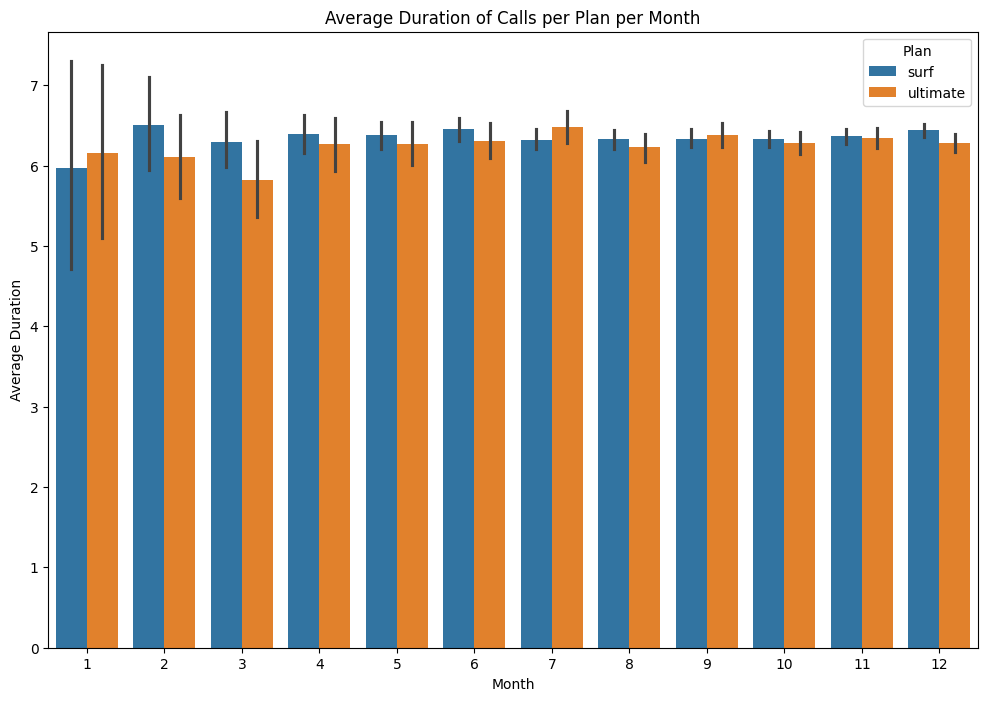

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x='month',y='duration',hue='plan',data=call_plans)

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Average Duration')
plt.title('Average Duration of Calls per Plan per Month')

# Show the plot
plt.legend(title='Plan')
plt.show()
plt.show()

##Q#2.Compare the number of minutes users of each plan use each month. Plot a histogram.


In [ ]:
# merge the users_plans with original calls dataframe to incorporate plans column
call_plans = calls.merge(users_plans,on='user_id',how='left')
# calculate average calls duration based on each plan per month
call_plans = call_plans.groupby(['plan','month'])['duration'].sum().reset_index()

call_plans

,plan,month,duration
0,surf,1,358
1,surf,2,2379
2,surf,3,6727
3,surf,4,15616
4,surf,5,27363
5,surf,6,37211
6,surf,7,48320
7,surf,8,59048
8,surf,9,71397
9,surf,10,90461


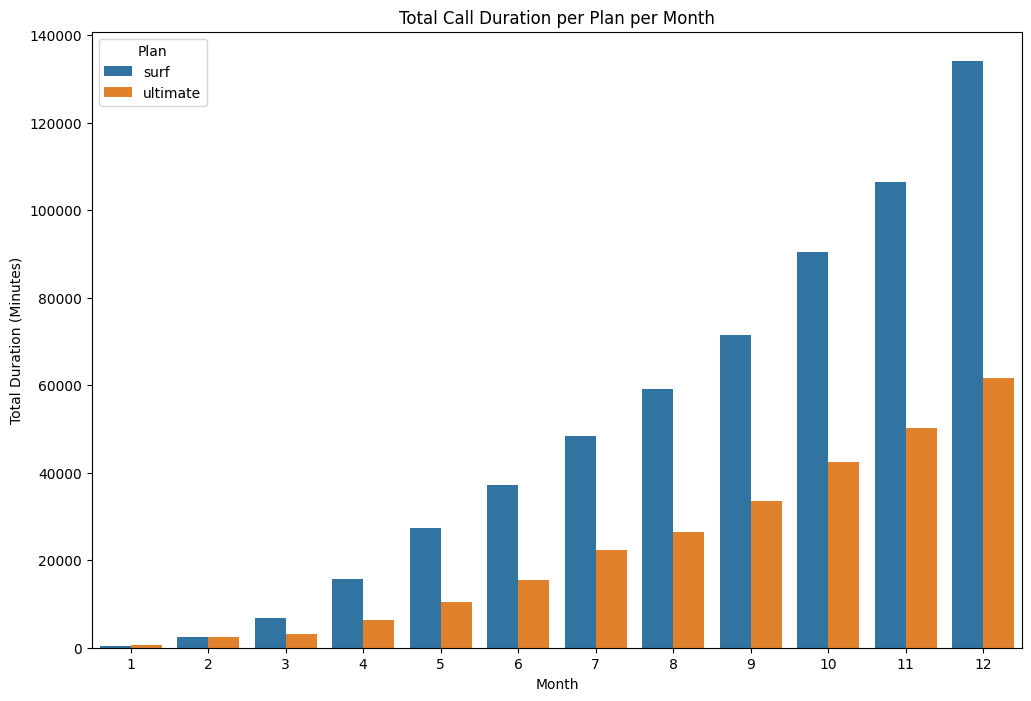

In [ ]:
# Plotting the sum of call durations per plan for each month
plt.figure(figsize=(12,8))
sns.barplot(x='month', y='duration', hue='plan', data=call_plans)

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Total Duration (Minutes)')
plt.title('Total Call Duration per Plan per Month')

# Show the plot
plt.legend(title='Plan')
plt.show()

In [ ]:
users['plan'].value_counts()

,count
plan,
surf,339
ultimate,161


##Q#3.Calculate and compare the mean and the variance of the monthly call duration**


In [ ]:
# merge the users_plans with original calls dataframe to incorporate plans column
call_plans = calls.merge(users_plans,on='user_id',how='left')
# calculate average calls duration based on each plan per month
monthly_mean = call_plans.groupby(['plan','month'])['duration'].mean().reset_index()
monthly_mean.rename(columns={'duration':'mean_duration'},inplace=True)
monthly_var = call_plans.groupby(['plan','month'])['duration'].var().reset_index()
monthly_var.rename(columns={'duration':'var_duration'},inplace=True)

In [ ]:
monthly_mean

,plan,month,mean_duration
0,surf,1,5.966667
1,surf,2,6.500000
2,surf,3,6.298689
3,surf,4,6.389525
4,surf,5,6.379809
5,surf,6,6.450165
6,surf,7,6.322952
7,surf,8,6.332225
8,surf,9,6.333452
9,surf,10,6.324617


In [ ]:
monthly_var

,plan,month,var_duration
0,surf,1,26.405650
1,surf,2,33.823288
2,surf,3,31.176868
3,surf,4,32.215789
4,surf,5,33.295777
5,surf,6,33.928905
6,surf,7,32.237528
7,surf,8,32.657525
8,surf,9,33.425794
9,surf,10,32.564103


In [ ]:
mean_and_var_call_df = monthly_mean.merge(monthly_var, on=['plan', 'month'], how='left')
mean_and_var_call_df

,plan,month,mean_duration,var_duration
0,surf,1,5.966667,26.405650
1,surf,2,6.500000,33.823288
2,surf,3,6.298689,31.176868
3,surf,4,6.389525,32.215789
4,surf,5,6.379809,33.295777
5,surf,6,6.450165,33.928905
6,surf,7,6.322952,32.237528
7,surf,8,6.332225,32.657525
8,surf,9,6.333452,33.425794
9,surf,10,6.324617,32.564103


<ipython-input-63-78bac55777e5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='mean_duration', data=mean_and_var_call_df, palette='Set2')


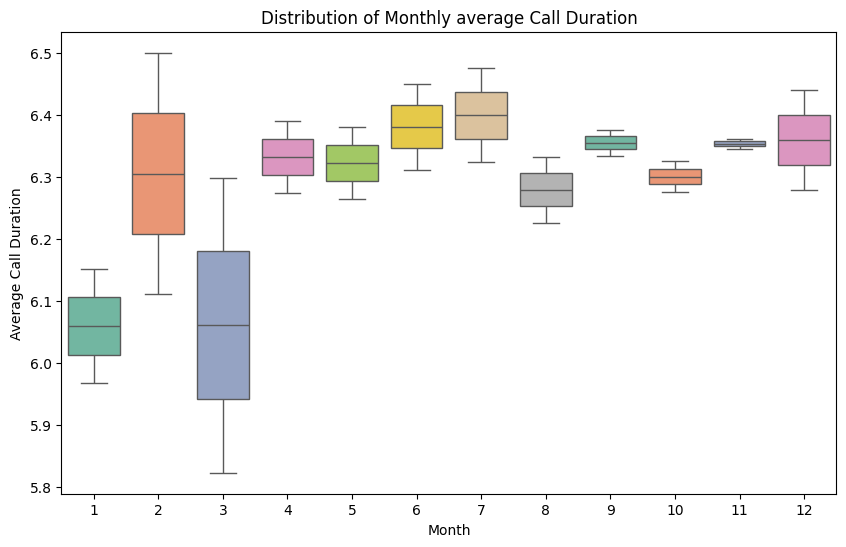

In [ ]:
# Create a boxplot to visualize the distribution of monthly call duration
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='mean_duration', data=mean_and_var_call_df, palette='Set2')

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Distribution of Monthly average Call Duration')

# Show the plot
plt.show()

<ipython-input-64-f1f0724f69c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='month', y='var_duration', data=mean_and_var_call_df, palette='Set2')


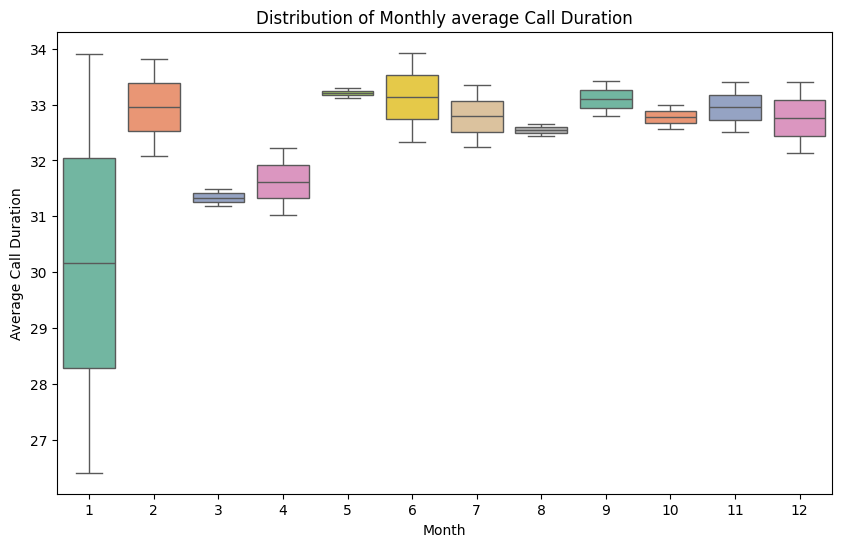

In [ ]:
# Create a boxplot to visualize the distribution of monthly call duration
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='var_duration', data=mean_and_var_call_df, palette='Set2')

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Average Call Duration')
plt.title('Distribution of Monthly average Call Duration')

# Show the plot
plt.show()

#Messages

##Q#4.Compare the number of messages users of each plan tend to send each month**


In [ ]:
messages

,id,user_id,message_date,month,message_day_of_week
0,1000_125,1000,2018-12-27,12,Thursday
1,1000_160,1000,2018-12-31,12,Monday
2,1000_223,1000,2018-12-31,12,Monday
3,1000_251,1000,2018-12-27,12,Thursday
4,1000_255,1000,2018-12-26,12,Wednesday
...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,Monday
76047,1497_536,1497,2018-12-24,12,Monday
76048,1497_547,1497,2018-12-31,12,Monday
76049,1497_558,1497,2018-12-24,12,Monday


In [ ]:
# merge the users_plans with original calls dataframe to incorporate plans column
messgae_plans = messages.merge(users_plans,on='user_id',how='left')
# calculate average calls duration based on each plan per month
messgae_plans = messgae_plans.groupby(['plan','month'])['id'].count().reset_index()
messgae_plans.rename(columns={'id':'message_count'},inplace=True)

messgae_plans

,plan,month,message_count
0,surf,1,21
1,surf,2,108
2,surf,3,351
3,surf,4,870
4,surf,5,1849
5,surf,6,2454
6,surf,7,3271
7,surf,8,4662
8,surf,9,5968
9,surf,10,8020


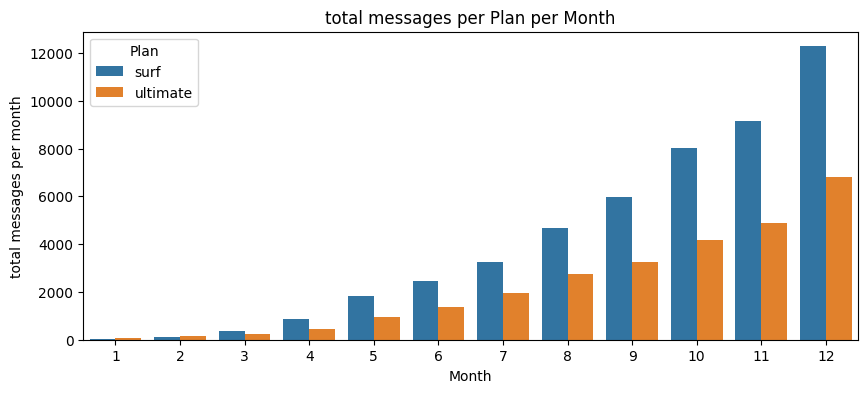

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='month',y='message_count',hue='plan',data=messgae_plans)

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('total messages per month')
plt.title('total messages per Plan per Month')

# Show the plot
plt.legend(title='Plan')
plt.show()

# Internet

##Q#1.Compare the amount of internet traffic consumed by users per plan per month

In [ ]:
# Merge the two DataFrames on 'user_id'
internet_plan = internet.merge(users_plans, on='user_id', how='left')
# Convert 'mb_used' to gigabytes (GB)
internet_plan['gb_used'] = internet_plan['mb_used'] / 1024
internet_plan = internet_plan.groupby(['plan','month'])['gb_used'].sum().reset_index()
internet_plan.rename(columns={'gb_used':'total_gb_used'},inplace=True)
internet_plan

,plan,month,total_gb_used
0,surf,1,9.533203
1,surf,2,107.164062
2,surf,3,300.101562
3,surf,4,585.849609
4,surf,5,1049.218750
5,surf,6,1451.169922
6,surf,7,1985.532227
7,surf,8,2660.164062
8,surf,9,3146.989258
9,surf,10,4011.345703


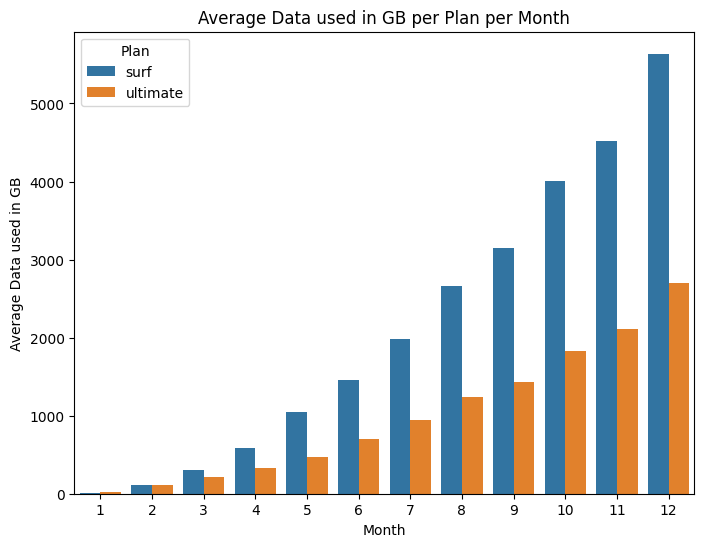

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='month',y='total_gb_used',hue='plan',data=internet_plan)

# Add labels and a title
plt.xlabel('Month')
plt.ylabel('Average Data used in GB')
plt.title('Average Data used in GB per Plan per Month')

# Show the plot
plt.legend(title='Plan')
plt.show()

In [ ]:
# Merge the two DataFrames on 'user_id'
internet_plan = internet.merge(users_plans, on='user_id', how='left')
# Convert 'mb_used' to gigabytes (GB)
internet_plan['gb_used'] = internet_plan['mb_used'] / 1024
internet_plan = internet_plan.groupby(['plan'])['gb_used'].sum().reset_index()
internet_plan.rename(columns={'gb_used':'total_gb_used'},inplace=True)
internet_plan

,plan,total_gb_used
0,surf,25465.633789
1,ultimate,12118.108398


<Axes: xlabel='plan', ylabel='total_gb_used'>

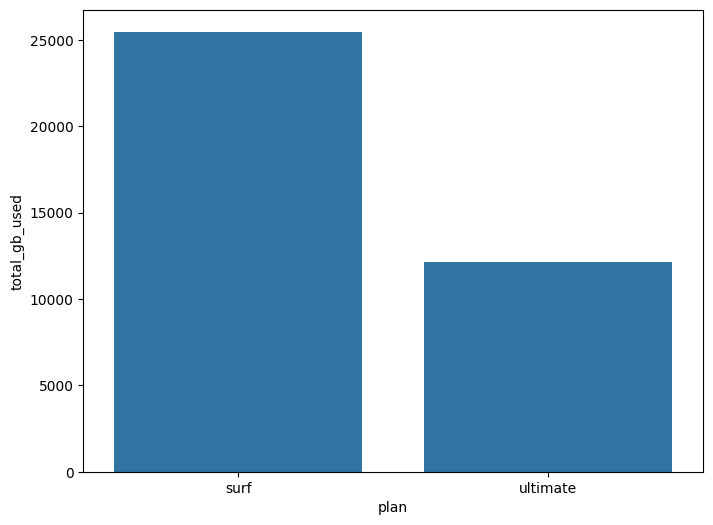

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='plan',y='total_gb_used',data=internet_plan)

In [ ]:
# Merge the two DataFrames on 'user_id'
internet_plan = internet.merge(users_plans, on='user_id', how='left')
internet_plan = internet_plan.groupby(['plan'])['mb_used'].mean().reset_index()
internet_plan.rename(columns={'mb_used':'average_mb_used'},inplace=True)
internet_plan

,plan,average_mb_used
0,surf,364.272469
1,ultimate,373.324799


<Axes: xlabel='plan', ylabel='average_mb_used'>

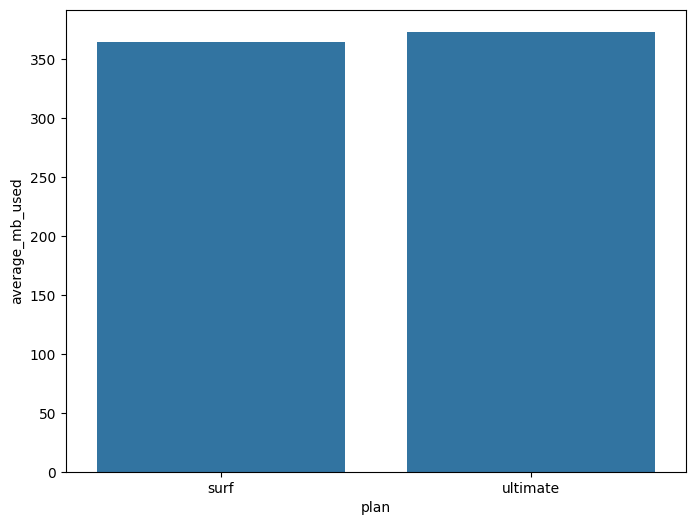

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x='plan',y='average_mb_used',data=internet_plan)

# Revenue

##Q#1.statistically describe the revenue between the plans

In [ ]:
merged_data.groupby('plan')['monthly_revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,57.101613,53.713421,20.0,20.0,35.810547,76.779609,580.222188
ultimate,720.0,72.129290,10.814493,70.0,70.0,70.000000,70.000000,178.787109


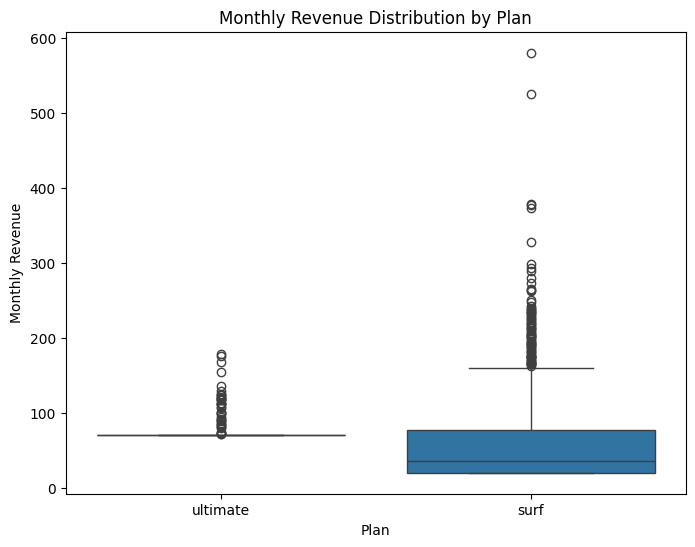

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='plan', y='monthly_revenue', data=merged_data)
plt.title('Monthly Revenue Distribution by Plan')
plt.xlabel('Plan')
plt.ylabel('Monthly Revenue')
plt.show()

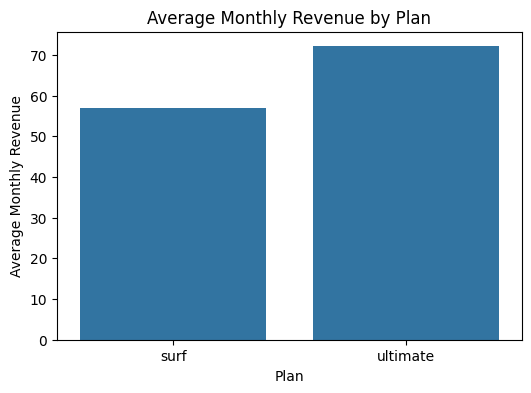

In [ ]:
# Group your DataFrame by the "plan" column and calculate the mean revenue for each plan
plan_revenue_mean = merged_data.groupby('plan')['monthly_revenue'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='plan', y='monthly_revenue', data=plan_revenue_mean)
plt.title('Average Monthly Revenue by Plan')
plt.xlabel('Plan')
plt.ylabel('Average Monthly Revenue')
plt.show()

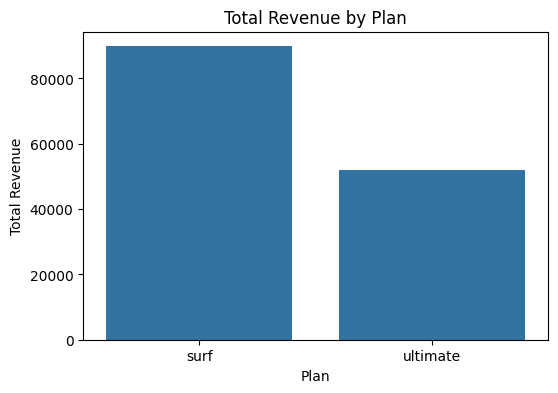

In [ ]:
# Group your DataFrame by the "plan" column and calculate the mean revenue for each plan
plan_revenue_mean = merged_data.groupby('plan')['monthly_revenue'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(6,4))
sns.barplot(x='plan', y='monthly_revenue', data=plan_revenue_mean)
plt.title('Total Revenue by Plan')
plt.xlabel('Plan')
plt.ylabel('Total Revenue')
plt.show()

#Hypotheis Testing

##1. Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

**Null Hypothesis (H0):**

The average revenue from users of the Ultimate and Surf calling plans is equal.

**Alternative Hypothesis (H1):**

The average revenue from users of the Ultimate and Surf calling plans is not equal.

**Statistic model**

To test this hypothesis, we can use a two-sample t-test because we are comparing the means of two independent groups (Ultimate and Surf plans) to determine if they are statistically different from each other.

**Significance Level (Alpha)**:

We need to choose a significance level, denoted as **α, which represents the probability of making a Type I error**. A common choice for α is 0.05, which corresponds to a 5% significance level. This means that we are willing to accept a 5% chance of making a Type I error (rejecting the null hypothesis when it's actually true).

In [ ]:
ultimate_revenue = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = merged_data[merged_data['plan'] == 'surf']['monthly_revenue']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(ultimate_revenue, surf_revenue , equal_var=False)

alpha = 0.05

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average revenue between Ultimate and Surf plan users.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average revenue between Ultimate and Surf plan users.")

T-statistic: 10.635232952459619
P-value: 1.1268925953386482e-25
Reject the null hypothesis. There is a significant difference in average revenue between Ultimate and Surf plan users.


##2. Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions

In [ ]:
# Merge the data on 'user_id' to get user information along with monthly revenue
merged_data = merged_data.merge(users[['user_id', 'state']], on='user_id', how='left')

# Separate revenue data for NY-NJ area and other regions
ny_nj_revenue = merged_data[merged_data['state'] == ' NY-NJ-PA MSA']['monthly_revenue']
other_regions_revenue = merged_data[merged_data['state'] != ' NY-NJ-PA MSA']['monthly_revenue']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(ny_nj_revenue, other_regions_revenue, equal_var=False)

alpha = 0.05

print(f'Test Statistic: {t_statistic}')
print(f'P-value: {p_value}')

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in average revenue between NY-NJ area users and users from other regions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in average revenue between NY-NJ area users and users from other regions.")


Test Statistic: -2.370383261733081
P-value: 0.018103513064212384
Reject the null hypothesis. There is a significant difference in average revenue between NY-NJ area users and users from other regions.


#Conclusion
1. **Comparison of Average Call Duration per Plan**
   - There is no considerable difference between the Average Duration of Calls per Plan per Month for the two different plans.
   - By closely examining the values of monthly mean duration and monthly variance, it becomes evident that there is no notable difference in call durations from month to month.

2. **Monthly Call Duration Trends**
   - The durations of calls are lower in the 1st and 3rd months compared to the other months.
   - There is a consistent pattern across all months where the total minutes used in the Surf plan are higher compared to the Ultimate plan.

3. **Total Minutes Usage by Plan**
   - For every month, the total minutes used in the Surf plan is higher than in the Ultimate plan.

4. **Monthly Message Trends**
   - There is a clear trend of increasing numbers of messages sent by users each month from January to December.
   - Users of the Surf plan tend to send more messages compared to users of the Ultimate plan in almost every month.

5. **Data Consumption Patterns**
   - There is a significant difference in data consumption between the Surf and Ultimate plans users, with Surf plan users consuming much more data.
   - It is evident that low data usage sessions are more frequent compared to high data usage sessions for both plans.

6. **Revenue Analysis by Plan**
   - The monthly revenue for Surf plans is generally higher compared to Ultimate plans.
   - However, when considering the Average Monthly Revenue, the Ultimate plan users generates more revenue than the Surf plan users.
   - The standard deviation of revenue is higher for the Surf plan users compared to the Ultimate plan users, indicating more outliers and higher variability in revenue for the Surf plan.

7. **Regional Revenue Differences**
   - There is a significant difference in average revenue between users of the Ultimate and Surf plans.
   - Additionally, there is a notable difference in average revenue between users from the NY-NJ area and users from other regions.